In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Preparing the Data for the Model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

In [9]:
image_gen.flow_from_directory('Dog_Health/train')

Found 130 images belonging to 2 classes.


In [10]:
image_gen.flow_from_directory('Dog_Health/test')

Found 80 images belonging to 2 classes.


In [11]:
image_shape = (150,150,3)

## Creating the Model

In [18]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'],
             )

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [25]:
batch_size = 12

In [27]:
train_image_gen = image_gen.flow_from_directory('Dog_Health/train',
                                               target_size=image_shape[:2],
                                                batch_size=batch_size,
                                               class_mode='binary'
                                               )

Found 130 images belonging to 2 classes.


In [29]:
test_image_gen = image_gen.flow_from_directory('Dog_Health/test',
                                               target_size=image_shape[:2],
                                                batch_size=batch_size,
                                               class_mode='binary'
                                               )

Found 80 images belonging to 2 classes.


In [31]:
results = model.fit(train_image_gen,
                   epochs=10,
                   steps_per_epoch=int(len(train_image_gen)/batch_size),validation_data=test_image_gen,validation_steps=6,)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4317 - loss: 0.8344 - val_accuracy: 0.6667 - val_loss: 0.6136
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.7173 - loss: 0.5518 - val_accuracy: 0.8750 - val_loss: 0.3636
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 927ms/step - accuracy: 0.7732 - loss: 0.5000 - val_accuracy: 0.6806 - val_loss: 0.5019
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 747ms/step - accuracy: 0.8364 - loss: 0.3735 - val_accuracy: 0.8750 - val_loss: 0.3940
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8624 - loss: 0.3627 - val_accuracy: 0.7361 - val_loss: 0.4291
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.8902 - loss: 0.2977 - val_accuracy: 0.6250 - val_loss: 0.7729
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 871ms/step - accuracy: 0.8519 - loss: 0.3526 - val_accuracy: 0.7639 - val_loss: 0.3503
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 620ms/step - accuracy: 0.8866 - loss: 0.2710 - val_accuracy: 0.87

## Evaluating the Model

In [34]:
loss, accuracy = model.evaluate(test_image_gen)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")
print(f"Final Test Loss: {loss * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 578ms/step - accuracy: 0.8151 - loss: 0.3792
Final Test Accuracy: 78.75%
Final Test Loss: 38.60%


In [35]:
results.history['accuracy']

[0.5153846144676208,
 0.6769230961799622,
 0.800000011920929,
 0.8153846263885498,
 0.8461538553237915,
 0.8461538553237915,
 0.8692307472229004,
 0.8538461327552795,
 0.800000011920929,
 0.8307692408561707]

In [36]:
model.save('dog_health_model.keras')

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step
Optimal Threshold: 0.54


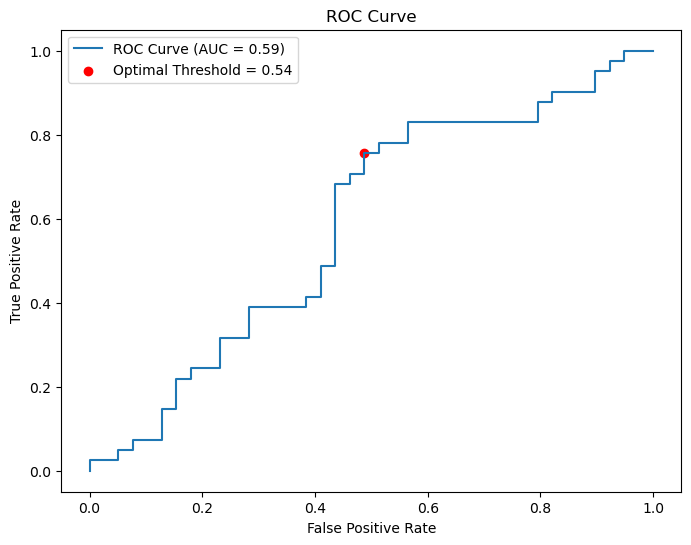

Classification Report:
               precision    recall  f1-score   support

Unhealthy Dog       0.67      0.51      0.58        39
  Healthy Dog       0.62      0.76      0.68        41

     accuracy                           0.64        80
    macro avg       0.64      0.63      0.63        80
 weighted avg       0.64      0.64      0.63        80



In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

y_true = test_image_gen.classes
y_pred_probs = model.predict(test_image_gen, batch_size=batch_size)
y_pred_probs = y_pred_probs[:, 0]

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_true, y_pred_probs)))
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label='Optimal Threshold = {:.2f}'.format(optimal_threshold))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

y_pred_labels = np.where(y_pred_probs >= optimal_threshold, 1, 0)

print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['Unhealthy Dog', 'Healthy Dog']))
